### Basic

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/ten

In [2]:
a=tf.add(3,5)
sess=tf.Session()

print(sess.run(a))
sess.close()

In [5]:
# 위 코드랑 동일
with tf.Session() as sess:
    print(sess.run(a))

8


In [22]:
x=2 
y=3

op1=tf.add(x,y)
op2=tf.multiply(x,y)
op3=tf.pow(op2,op1)

useless=tf.multiply(x,op1) ##실행 안됨

with tf.Session() as sess:
    print(sess.run(op3)) #op3연산하는데 필요한 op1, op2도 실행됨

7776


In [23]:
sess=tf.Session()
op3, useless = sess.run([op3, useless])
sess.close()

## Linear Regression

### 1. Data 준비

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

x_data=datasets.load_boston().data[:,12]
y_data=datasets.load_boston().target

df=pd.DataFrame([x_data,y_data]).transpose()

df.head()


,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


### 2. Build the model

In [34]:
# tf.Variable(초기화 방법)
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w* x_data + b #model

### 3. Set the criterion : Cost funtion & Gradient Descent method

In [35]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

### 4. Train the model

In [36]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화
    for step in range(10000): # epoch 10000
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드
        if(step%1000)==0:
            print('Step {}: w {} b {}'.format(step, sess.run(a), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
            
    w_out, b_out = sess.run([w, b])

Step 0: w 8 b [0.43572015]
loss 514.9185180664062

Step 1000: w 8 b [13.494832]
loss 145.45590209960938

Step 2000: w 8 b [21.53337]
loss 79.37622833251953

Step 3000: w 8 b [26.503456]
loss 54.115562438964844

Step 4000: w 8 b [29.576399]
loss 44.45896530151367

Step 5000: w 8 b [31.47636]
loss 40.7674560546875

Step 6000: w 8 b [32.651066]
loss 39.356292724609375

Step 7000: w 8 b [33.377377]
loss 38.81681823730469

Step 8000: w 8 b [33.826447]
loss 38.610595703125

Step 9000: w 8 b [34.104088]
loss 38.531761169433594



### Visualize the result

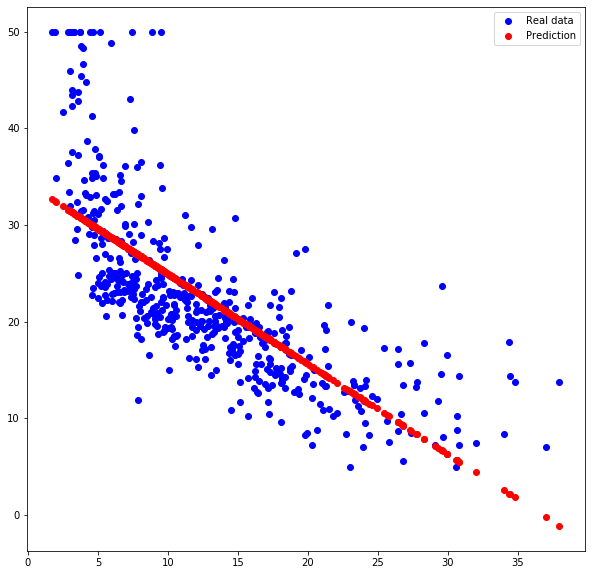

In [38]:
plt.figure(figsize = (10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction') # prediction
plt.legend()
plt.show()

## Regression with Neural Network

### 1. Prepare the data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

x_data=datasets.load_boston().data[:,12]
y_data=datasets.load_boston().target

df=pd.DataFrame([x_data,y_data]).transpose()

df.head()


/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/ten

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


### 2. Build the model

In [2]:
_x_data = tf.reshape(x_data, [len(x_data),1]) # len(x_data)(506행) 1열로 reshape

W = tf.Variable(tf.random_normal([1,5], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([5,1], dtype=tf.float64))

hidden = tf.nn.sigmoid(tf.matmul(_x_data, W)) # 506 * 5
output = tf.matmul(hidden, W_out)

Instructions for updating:
Colocations handled automatically by placer.


### 3. Set the criterion : Cost function & Gradient descent method

In [3]:
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

### 4. Train the model

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || Loss : 536.8711149284813
Step 5000 || Loss : 84.43351598291275
Step 10000 || Loss : 84.42886026308354
Step 15000 || Loss : 84.42658135208293
Step 20000 || Loss : 84.42521107959826
Step 25000 || Loss : 84.42428996111434
Step 30000 || Loss : 84.42362547301056
Step 35000 || Loss : 84.42312209222105
Step 40000 || Loss : 84.4227268037583
Step 45000 || Loss : 84.4224077245641


### 5. Visualize the result

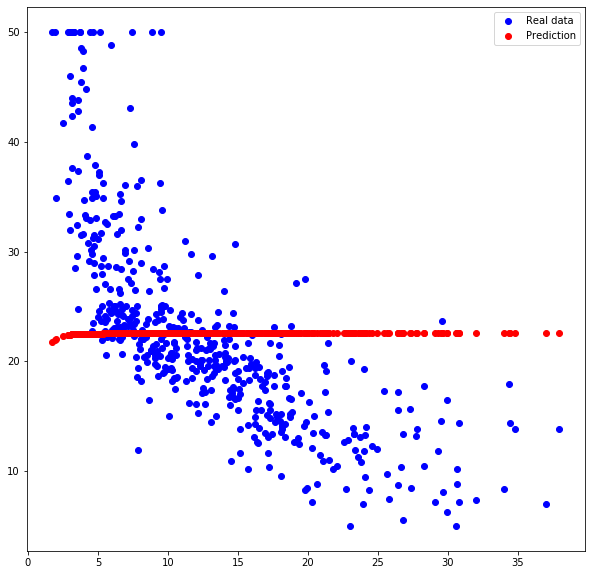

In [5]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

## Regression with Neural Network- Hidden Layer 2

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

### 1. Prepare the data

In [3]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

### 2. Build the model

In [4]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

In [7]:
W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # [ # of x's columns, # of nodes in 1st hidden layer ]
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64)) # [ # of previous W's columns, # of nodes in 2nd hidden layer ]
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64)) # [ # of previous W's columns, # of y's columns ]

In [8]:
hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

### 3. Set the criterion

In [11]:
loss = tf.losses.mean_squared_error(output, _y_data) # tf.reduce_mean(tf.square(output - _y_data))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

### 4. Train the model

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || Loss : 407.614990234375
Step 5000 || Loss : 27.75872039794922
Step 10000 || Loss : 27.41254234313965
Step 15000 || Loss : 27.251012802124023
Step 20000 || Loss : 26.860000610351562
Step 25000 || Loss : 26.530071258544922
Step 30000 || Loss : 26.43341827392578
Step 35000 || Loss : 26.382837295532227
Step 40000 || Loss : 26.352046966552734
Step 45000 || Loss : 26.331275939941406


### 5. Visualize trained model

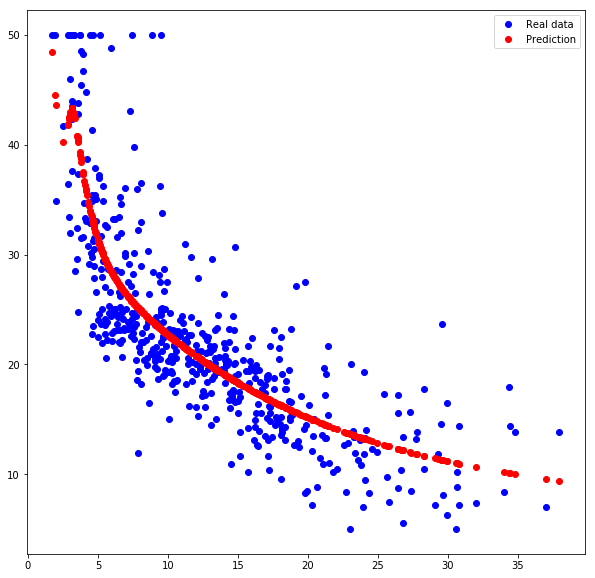

In [13]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

#### 2. Build the model

_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # [ # of x's columns, # of nodes in 1st hidden layer ]
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64)) # [ # of previous W's columns, # of nodes in 2nd hidden layer ]
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64)) # [ # of previous W's columns, # of y's columns ]

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

#### 3. Set the criterion

loss = tf.losses.mean_squared_error(output, _y_data) # tf.reduce_mean(tf.square(output - _y_data))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

#### 5. Visualize trained model

plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()